In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None


In [2]:

data = pd.read_csv(r"Clean_data.csv")
data.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41.0,Yes,Travel_Rarely,802.0,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6.0,4,0,5
1,2,49.0,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10.0,7,1,7
2,4,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0.0,0,0,0
3,5,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8.0,7,3,0
4,7,27.0,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2.0,2,2,2


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in data.select_dtypes("object").columns:
    data[col]=encoder.fit_transform(data[col])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1470 non-null   float64
 2   Attrition                 1470 non-null   int32  
 3   BusinessTravel            1470 non-null   int32  
 4   DailyRate                 1470 non-null   float64
 5   Department                1470 non-null   int32  
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   int32  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   int32  
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [5]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

Accuracy: 0.9675675675675676
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       369
           1       0.96      0.98      0.97       371

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



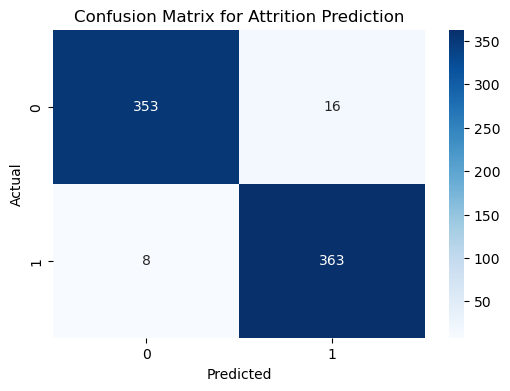

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier



# Split data into features (X) and target (y)
X = data.drop(columns='Attrition')
y = data['Attrition']
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC


rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overesampled, y_overesampled = rus.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_overesampled, y_overesampled, test_size=0.3, random_state=42)





# apply pca
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)


model = RandomForestClassifier()
model.fit(x_train_pca, y_train)

# Make predictions
y_pred = model.predict(x_test_pca)

# Print evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
X_train.shape

(1726, 31)

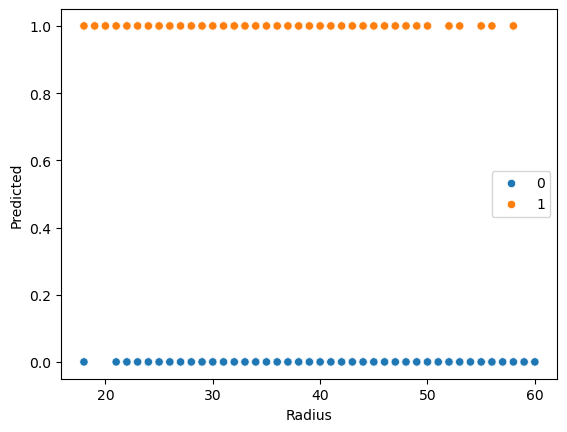

In [8]:
y_pred = y_pred.squeeze()
x_test_view = X_test["Age"].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score


# تقسيم الميزات (X) والهدف (y)
X = data.drop('MonthlyIncome', axis=1)
y = data['MonthlyIncome']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)

# بناء نموذج الانحدار الخطي
model = LinearRegression()
model.fit(x_train_pca, y_train)

# التنبؤ بالقيم
y_pred = model.predict(x_test_pca)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
px.scatter(x=y_pred,y=y_test,trendline='ols')


Mean Squared Error: 2307326.37
R^2 Score: 0.89


In [10]:
data["PerformanceRating"].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [11]:
data["JobSatisfaction"].value_counts()

JobSatisfaction
4.0    510
3.0    424
1.0    276
2.0    260
Name: count, dtype: int64

              precision    recall  f1-score   support

           3       1.00      0.89      0.94       381
           4       0.90      1.00      0.95       366

    accuracy                           0.94       747
   macro avg       0.95      0.94      0.94       747
weighted avg       0.95      0.94      0.94       747



c:\Users\CompuMarts\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



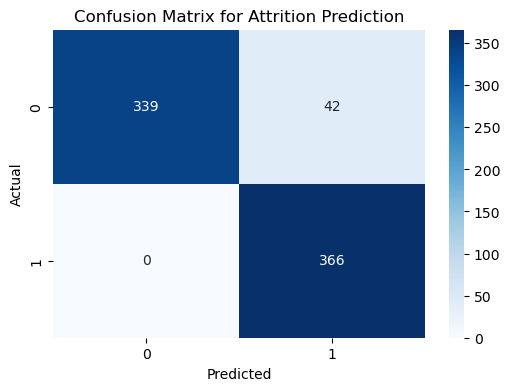

In [12]:
# Performance Rating Prediction
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Assuming 'data' is your DataFrame
# Features (X) and target (y)
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']


rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overesampled, y_overesampled = rus.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_overesampled, y_overesampled, test_size=0.3, random_state=42)

pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)

model = LogisticRegression(C=0.01, random_state=42)

model.fit(x_train_pca, y_train)

# Predictions and evaluation
y_pred = model.predict(x_test_pca)

# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

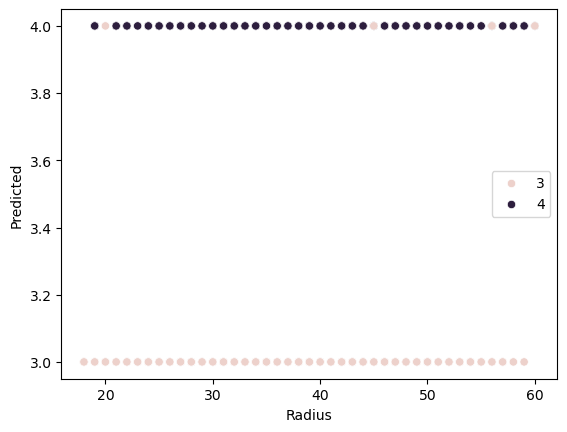

In [13]:
y_pred = y_pred.squeeze()
x_test_view = X_test["Age"].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [14]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4.0    510
3.0    424
1.0    276
2.0    260
Name: count, dtype: int64

In [15]:
data["WorkLifeBalance"].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       0.78      0.89      0.83       245
           3       0.90      0.81      0.85       311
           4       0.99      0.99      0.99       267

    accuracy                           0.92      1072
   macro avg       0.92      0.92      0.92      1072
weighted avg       0.92      0.92      0.92      1072



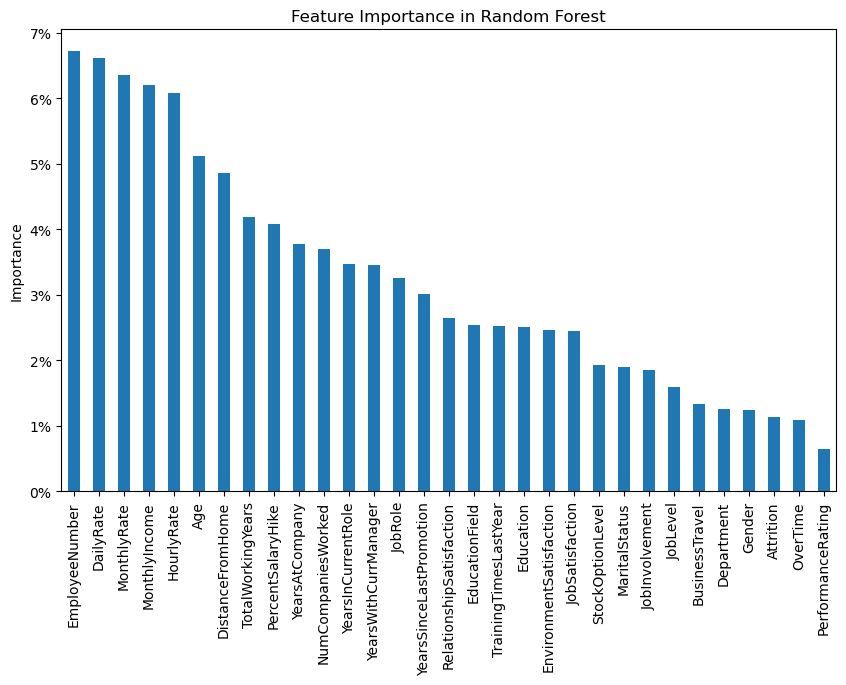

In [20]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FuncFormatter


# Split data into features and target
X = data.drop('WorkLifeBalance', axis=1)
y = data['WorkLifeBalance']
rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

# Get feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False) * 100

# Define a function to format the y-axis ticks as percentages
def to_percent(y, position):
    return f'{y:.0f}%'

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')

# Apply percentage formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.show()